#### Step 1: Import all lab

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Step 2: load dataset

In [28]:
data = pd.read_csv('train_set.csv')
data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


#### Step 3: Data Cleaning, Data Warngling, Data Preprocessing

In [29]:
data = data.drop(['OGC','DC','UC','EI','YT'], axis=1)
data.head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
0,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,12196,0,0.00,16158
1,2013,Community Health,Public Health,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,74639,2820,12703.31,115784
2,2015,General Administration & Finance,Assessor/Recorder,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,100554,0,12424.50,144708
3,2016,Public Protection,Police,Police Officers' Association,Police Services,Sergeant 3,140164,52754,13043.87,242323
4,2013,"Public Works, Transportation & Commerce",PUC Hetch Hetchy,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,58813,0,7655.28,82106


In [30]:
data.dtypes

Year                    int64
OG                     object
Dept                   object
Union                  object
JF                     object
Job                    object
Salaries                int64
Overtime                int64
H/D                   float64
Total_Compensation      int64
dtype: object

In [31]:
data.shape

(287836, 10)

In [32]:
data.isnull().sum()

Year                   0
OG                     0
Dept                   0
Union                 36
JF                    38
Job                    0
Salaries               0
Overtime               0
H/D                    0
Total_Compensation     0
dtype: int64

In [ ]:
# missing value tratment

In [33]:
data['Union'] = data['Union'].fillna(data['Union'].mode()[0])
data['JF'] = data['JF'].fillna(data['JF'].mode()[0])
data.isnull().sum()

Year                  0
OG                    0
Dept                  0
Union                 0
JF                    0
Job                   0
Salaries              0
Overtime              0
H/D                   0
Total_Compensation    0
dtype: int64

In [ ]:
# feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [35]:
data[['Salaries','Overtime','H/D','Total_Compensation']] = ss.fit_transform(data[['Salaries','Overtime','H/D','Total_Compensation']])
data.head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
0,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,-1.144004,-0.397237,-1.825247,-1.207859
1,2013,Community Health,Public Health,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,0.254853,-0.142704,0.770410,0.262638
2,2015,General Administration & Finance,Assessor/Recorder,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,0.835405,-0.397237,0.713441,0.689561
3,2016,Public Protection,Police,Police Officers' Association,Police Services,Sergeant 3,1.722754,4.364333,0.839996,2.130375
4,2013,"Public Works, Transportation & Commerce",PUC Hetch Hetchy,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,-0.099683,-0.397237,-0.261050,-0.234455


In [ ]:
# apply  Labelencoding to text column

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [37]:
data['OG'] = le.fit_transform(data['OG'])
data['Dept'] = le.fit_transform(data['Dept'])
data['Union'] = le.fit_transform(data['Union'])
data['JF'] = le.fit_transform(data['JF'])
data['Job'] = le.fit_transform(data['Job'])
data.head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
0,2015,0,45,57,28,671,-1.144004,-0.397237,-1.825247,-1.207859
1,2013,0,45,63,23,1011,0.254853,-0.142704,0.770410,0.262638
2,2015,2,5,52,6,911,0.835405,-0.397237,0.713441,0.689561
3,2016,5,42,47,35,925,1.722754,4.364333,0.839996,2.130375
4,2013,6,38,52,22,496,-0.099683,-0.397237,-0.261050,-0.234455


- Check the relation between independent and dependent variable

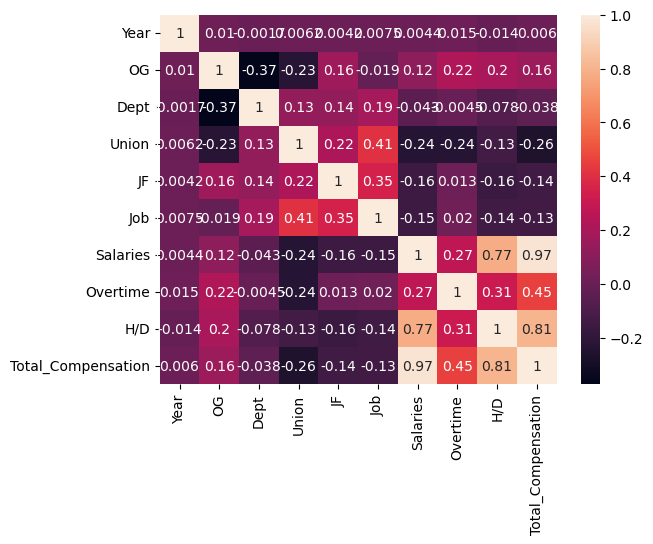

In [38]:
sns.heatmap(data.corr(), annot=True)
plt.show()

### Observation:
    - 'Year', 'OG', 'Dept','Union','JF','Job' having less relation with Total_Compensation (dependet/ Traget variable)
    - so we remove these column from dataset

In [39]:
data = data.drop(['Year', 'OG', 'Dept','Union','JF', 'Job'], axis=1)
data.head()

,Salaries,Overtime,H/D,Total_Compensation
0,-1.144004,-0.397237,-1.825247,-1.207859
1,0.254853,-0.142704,0.770410,0.262638
2,0.835405,-0.397237,0.713441,0.689561
3,1.722754,4.364333,0.839996,2.130375
4,-0.099683,-0.397237,-0.261050,-0.234455


#### Step 4: Separate data into x and y

In [40]:
x= data.drop('Total_Compensation', axis=1)
y = data['Total_Compensation']

#### Step 5: Split data into train and test set

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#### Step 6: Apply LR algorithm on dataset

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

#### Step 7: Prediction

In [44]:
y_pred = lr.predict(x_test)
y_pred

array([ 0.07782714, -1.40798583,  1.58017061, ..., -0.95211473,
        0.61446448,  0.30741243])

#### Step 8: Evaluation

In [45]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred, y_test)
accuracy

0.9877112817282957

- accuracy is 98% 

### Observation:
    - In above dataset there is multiple independent column 
    - Linear equation become : y = m1x1 + m2x2 + m3x3 + c
                        here : y = Total_Compensation
                               x1 = Salaries
                               x2 = Overtimes
                               x3 = H/D
                               m = slope
                               c = intercept

In [46]:
m = lr.coef_
m

array([0.85616668, 0.19524735, 0.08172468])

In [48]:
c = lr.intercept_
c

4.867195852188092e-05